# Time series forecasting E-commerce sales using Deep Neural Net models

Dependencies

In [115]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib import dates

Available GPU for Tensorflow

In [116]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [117]:
df_commerce = pd.read_csv('../data/e_commerce_uk.csv', encoding = 'ISO-8859-1')

In [118]:
df_commerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [128]:
df_commerce['ds'] = pd.to_datetime(df_commerce.InvoiceDate).dt.date
df_commerce['y'] = df_commerce.Quantity * df_commerce.UnitPrice
df_commerce.y = df_commerce.y.astype(int)
df_commerce[['ds', 'y']].groupby('ds').sum().reset_index().to_csv('../data/ecommercegeneralsales.csv', index=False)

In [5]:
df_commerce.shape

(541909, 8)

Null values check

In [6]:
df_commerce.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Statistics

In [7]:
df_commerce.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Null value check

In [8]:
df_commerce[df_commerce.Description.isna()].UnitPrice.sum()

0.0

Row-wise slicing for keeping non-zero unit price records

In [9]:
df_w_unit_price = df_commerce[df_commerce.UnitPrice != 0].copy()
print(f'Removed: {len(df_commerce) - len(df_w_unit_price)}')

Removed: 2515


In [10]:
df_w_unit_price['Total'] = df_w_unit_price.Quantity * df_w_unit_price.UnitPrice

Plot occurrence of outliers

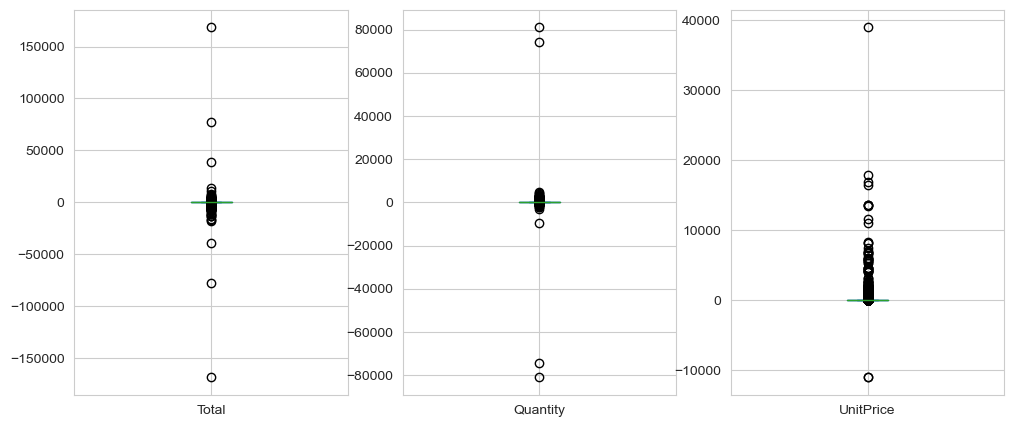

In [11]:
df_w_unit_price[['Total', 'Quantity', 'UnitPrice']].plot.box(subplots=True, figsize=(12, 5));

Let's detect statistically the outliers by using zscore along with transforming the numerical values into positive values.

$$ z = {x-\mu \over \sigma} $$
$$ zscore = {|z|} $$


In [12]:
z_scores = np.abs(stats.zscore(df_w_unit_price.Total))

Now, only the values that are lower than 3 std are selected as no outlier

In [13]:
no_outliers = z_scores < 3
df_no_outliers = df_w_unit_price[no_outliers]

In [14]:
df_no_outliers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [15]:
print(f'Removed: {len(df_w_unit_price) - len(df_no_outliers)}')

Removed: 401


<AxesSubplot: title={'center': 'DayYear'}>

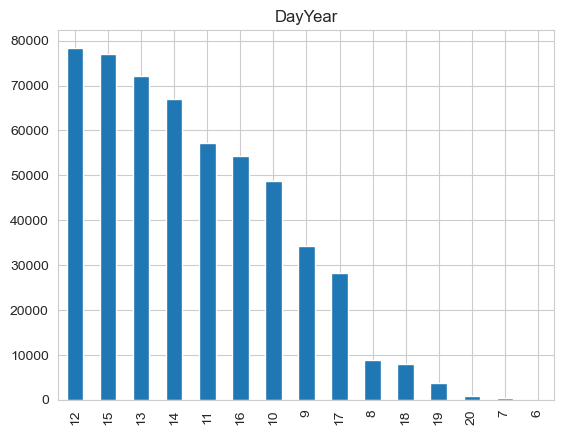

In [16]:
pd.to_datetime(df_no_outliers.InvoiceDate).dt.hour.value_counts().plot.bar(title='DayYear')

In [17]:
df_no_outliers['Jdate'] = pd.to_datetime(df_no_outliers.InvoiceDate).dt.date

/var/folders/bh/hhr2wkwn2ldcpz5w4tgn7sb80000gn/T/ipykernel_83917/3108741979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Jdate'] = pd.to_datetime(df_no_outliers.InvoiceDate).dt.date


In [18]:
cols = ['Jdate', 'Total']
df_general_sales = df_no_outliers[cols].groupby('Jdate').sum()

In [19]:
df_general_sales.head()

,Total
Jdate,
2010-12-01,57008.36
2010-12-02,43146.48
2010-12-03,44306.46
2010-12-05,31383.95
2010-12-06,50906.98


In [20]:
df_general_sales = df_general_sales.reset_index()
df_general_sales.head()

,Jdate,Total
0,2010-12-01,57008.36
1,2010-12-02,43146.48
2,2010-12-03,44306.46
3,2010-12-05,31383.95
4,2010-12-06,50906.98


In [21]:
df_r_win = df_general_sales.copy()
df_r_win.Total = df_r_win.Total.rolling(window=30).mean()

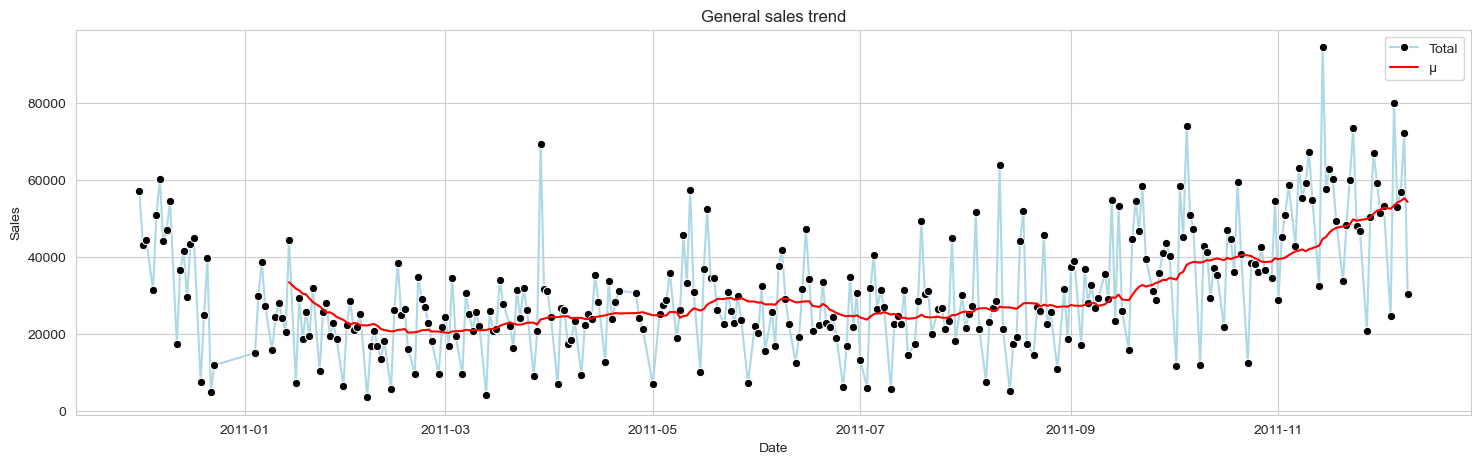

In [22]:
fig, ax = plt.subplots(figsize = (18,5))

sns.lineplot(ax=ax, data=df_general_sales.set_index('Jdate').iloc[:, 0], color="lightblue", marker='o', mfc='k', mec='white', label='Total')
g1 = sns.lineplot(ax=ax, data=df_r_win.set_index('Jdate').iloc[:, 0], color="red", label='µ')

g1.set_title('General sales trend')
g1.set_ylabel('Sales')
g1.set_xlabel('Date')

ax.legend();

In [23]:
x = df_general_sales.copy()
x['D'] = x.Jdate.astype(str).apply(lambda x: dates.datestr2num(x))

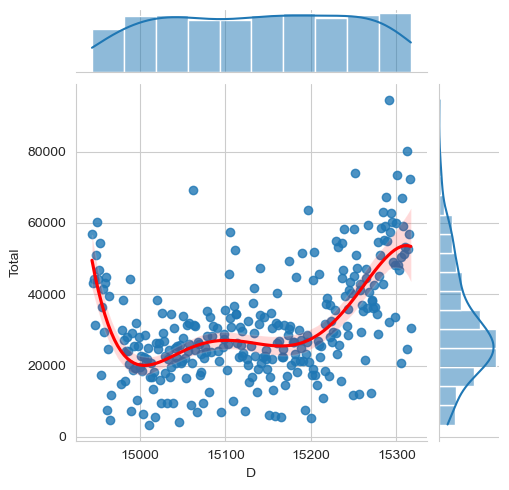

In [24]:
sns.jointplot(x="D", y="Total", data=x, kind="reg", order=5, height=5, line_kws={"color": "red"});

In [25]:
df_no_outliers = df_no_outliers.reset_index()

In [26]:
df_no_outliers = df_no_outliers.rename(columns={'index':'Id'})

The data is sliced to remain the important features for training

In [27]:
df_before_training = df_no_outliers[['Id', 'InvoiceDate', 'Total']].copy()

Transforming time

In [28]:
df_before_training['Jdate'] = pd.to_datetime(df_before_training.InvoiceDate)

In [29]:
df_before_training['Jseconds'] = df_before_training.Jdate.map(pd.Timestamp.timestamp)

As the interest lies on daily periodicity, the Jseconds needs to be transformed in sine and cosine to obtain 'Time of day'. This transformation allows for useful model input and gives the model access to the most important frequency features.

In [30]:
day = 24*60*60
year = (365.2425)*day

df_before_training['Day sin'] = np.sin(df_before_training.Jseconds * (2 * np.pi / day))
df_before_training['Day cos'] = np.cos(df_before_training.Jseconds * (2 * np.pi / day))
df_before_training['Year sin'] = np.sin(df_before_training.Jseconds * (2 * np.pi / year))
df_before_training['Year cos'] = np.cos(df_before_training.Jseconds * (2 * np.pi / year))

In [31]:
df_before_training.head()

,Id,InvoiceDate,Total,Jdate,Jseconds,Day sin,Day cos,Year sin,Year cos
0,0,12/1/2010 8:26,15.30,2010-12-01 08:26:00,1.291192e+09,0.803857,-0.594823,-0.502296,0.864696
1,1,12/1/2010 8:26,20.34,2010-12-01 08:26:00,1.291192e+09,0.803857,-0.594823,-0.502296,0.864696
2,2,12/1/2010 8:26,22.00,2010-12-01 08:26:00,1.291192e+09,0.803857,-0.594823,-0.502296,0.864696
3,3,12/1/2010 8:26,20.34,2010-12-01 08:26:00,1.291192e+09,0.803857,-0.594823,-0.502296,0.864696
4,4,12/1/2010 8:26,20.34,2010-12-01 08:26:00,1.291192e+09,0.803857,-0.594823,-0.502296,0.864696


The data is not randomly shuffled before splitting in order to ensure that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.

In [32]:
cols = ['Total', 'Day sin', 'Day cos', 'Year sin', 'Year cos']

df_final_features = df_before_training[cols]

column_indices = {name: i for i, name in enumerate(df_final_features.columns)}

n = len(df_before_training)

train_df = df_final_features[0:int(n*0.7)]
val_df = df_final_features[int(n*0.7):int(n*0.9)]
test_df = df_final_features[int(n*0.9):]

num_features = 5

In [33]:
train_df.shape, val_df.shape, test_df.shape

((377295, 5), (107798, 5), (53900, 5))

Normalize data before training a neural network

In [34]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

Plot normalized features

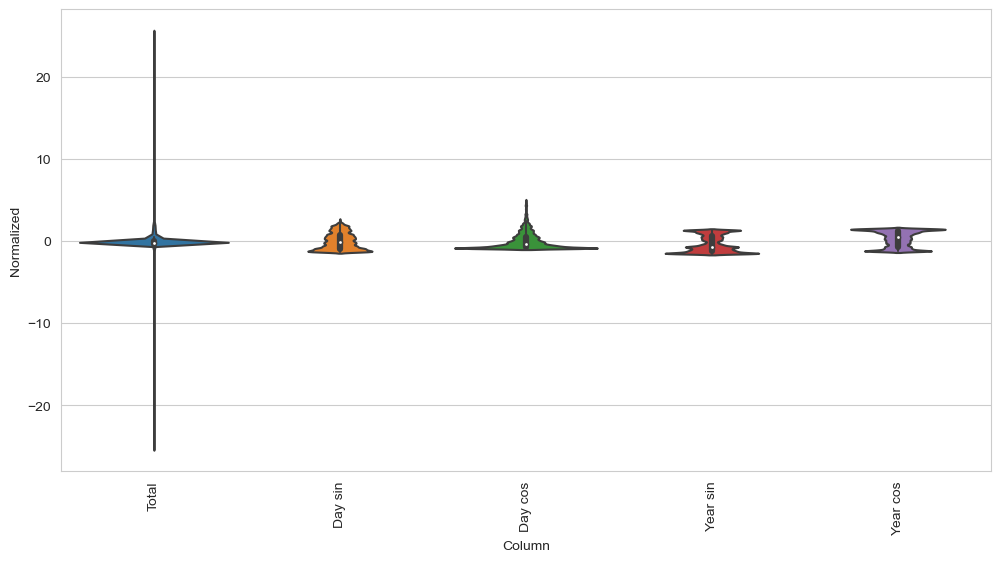

In [35]:
df_std = (df_final_features - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_final_features.keys(), rotation=90)

Data windowing

- single prediction 24 hours into the future given a history of 24 hours results in total width of 48
- a prediction 1 hour into the future given a history of 6 hours results in total width of 7
- 1 label width equals 1 index, so total width of eg 7 means 7 labels

## Window creator

In [36]:
class WindowGen:

  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    # shift represents the offset
    self.shift = shift

    self.total_window_size = input_width + shift

    # for slicing e.g. slice(0, 6) = start 0, stop 6, step 1
    self.input_slice = slice(0, input_width)
    # e.g. slicing an array with n steps, equal to -> np.arrange(10)[0:10:2] = {0, 2, 4, 6, 8} = slice(0, 10, 2)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]


  def split_window(self, features):
      """
      Transforms features into a window of inputs and labels
      :param features: set of features consisting of inputs and labels
      :return: window of inputs and labels
      """
      inputs = features[:, self.input_slice, :]
      labels = features[:, self.labels_slice, :]
      if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
      inputs.set_shape([None, self.input_width, None])
      labels.set_shape([None, self.label_width, None])

      return inputs, labels


  def plot(self, plot_col, model=None, max_subplots=3):
      inputs, labels = self.example
      plt.figure(figsize=(12, 8))
      plot_col_index = self.column_indices[plot_col]
      max_n = min(max_subplots, len(inputs))
      for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
          label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
          label_col_index = plot_col_index

        if label_col_index is None:
          continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
          predictions = model(inputs)
          plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

        if n == 0:
          plt.legend()

      plt.xlabel('Time [h]')

  def make_dataset(self, data):
      data = np.array(data, dtype=np.float32)
      ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

      ds = ds.map(self.split_window)

      return ds

  @property
  def train(self):
      return self.make_dataset(self.train_df)

  @property
  def val(self):
      return self.make_dataset(self.val_df)

  @property
  def test(self):
      return self.make_dataset(self.test_df)

  @property
  def example(self):
      """
      For caching example batch of inputs labels for plotting
      :return: example
      """
      result = getattr(self, '_example', None)
      if result is None:
          result = next(iter(self.train))
          self._example = result

      return result

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

An example of a prediction of 1 hour into the future given a history of 6 hours with label width 1

In [37]:
w = WindowGen(input_width=6, label_width=1, shift=1,
                     label_columns=['Total'])
w

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Total']

Example splitted window

In [38]:
example_window = tf.stack([np.array(train_df[:w.total_window_size]),
                           np.array(train_df[100:100+w.total_window_size]),
                           np.array(train_df[200:200+w.total_window_size])])

example_inputs, example_labels = w.split_window(example_window)

Metal device set to: Apple M1 Pro


2022-09-28 13:29:13.329101: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-28 13:29:13.329226: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [39]:
print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 5)
Inputs shape: (3, 6, 5)
Labels shape: (3, 1, 1)


2022-09-28 13:29:13.450312: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


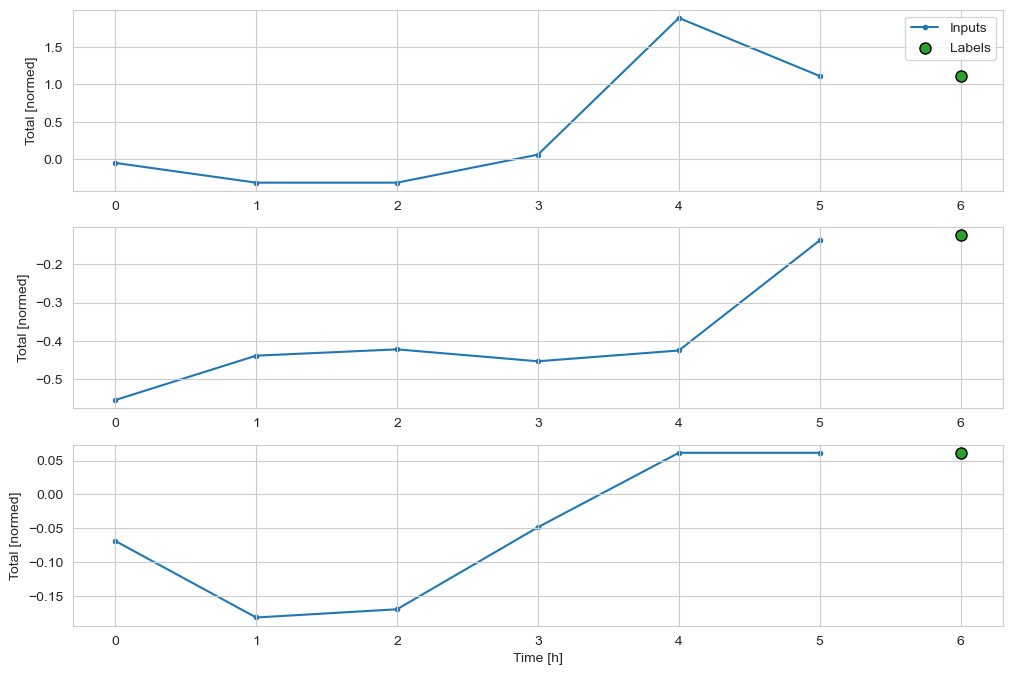

In [40]:
w.plot(plot_col='Total');

Inspec the Tensor data structure

In [41]:
w.train.element_spec

(TensorSpec(shape=(None, 6, 5), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [42]:
for example_inputs, example_labels in w.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 5)
Labels shape (batch, time, features): (32, 1, 1)


## Applying Baseline Model
- Single Model prediction into the future
- A single model predicts only a single features value, e.g. sale. A multi would predict a set of features values, e.g. sale and country.

In [43]:
history = 1
future = 1
features = ['Total']

single_step_window = WindowGen(
    input_width=history, label_width=1, shift=future,
    label_columns=features)

single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Total']

Structure of the Tensor training dataset

In [44]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 5)
Labels shape (batch, time, features): (32, 1, 1)


In [45]:
class Baseline(tf.keras.Model):
    """
    Baseline for comparison of multi models
    """
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs, training=None, mask=None):
        if self.label_index is None:
          return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [46]:
column_indices = {name: i for i, name in enumerate(df_final_features.columns)}

### Train

In [47]:
baseline = Baseline(label_index=column_indices['Total'])
baseline.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.losses.MeanAbsoluteError()])

val_perform = {'Baseline':baseline.evaluate(single_step_window.val)}
perform = {'Baseline':baseline.evaluate(single_step_window.test, verbose=0)}

  30/3369 [..............................] - ETA: 11s - loss: 0.5692 - mean_absolute_error: 0.2728

2022-09-28 13:29:17.020826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3369/3369 [==============================] - 12s 3ms/step - loss: 1.0385 - mean_absolute_error: 0.2816


In order to validate the performance lets apply more samples. This can be achieved by creating a new Window with a history of 24h and future prediction of 1h.

In [95]:
wider_window = WindowGen(
    input_width=24, label_width=24, shift=1,
    label_columns=['Total'])

wider_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Total']

In [49]:
print('Input shape:', wider_window.example[0].shape)
print('Output shape:', baseline(wider_window.example[0]).shape)

Input shape: (32, 24, 5)
Output shape: (32, 24, 1)


Labels shifted 1 hour to the right

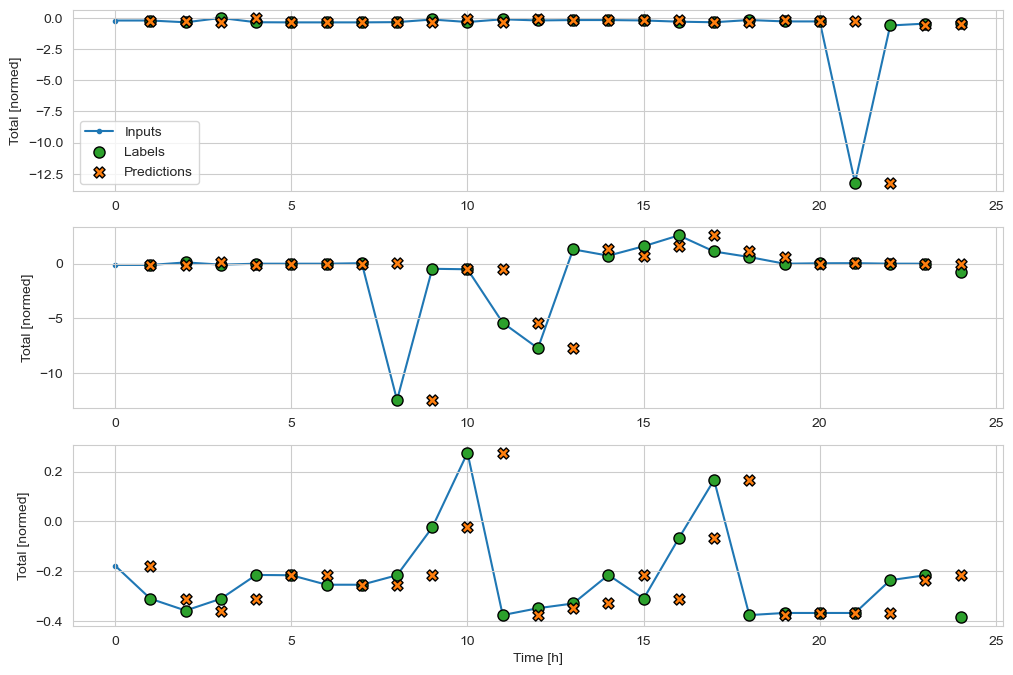

In [50]:
wider_window.plot(plot_col='Total', model=baseline)

In the plot above blue line depicts Total sale at each time step, green dot represents the target prediction value and the orange the predicted value at each time step.

## Applying Linear Model
Here no activation layer is applied in order to remain a linear model

In [51]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [52]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 5)
Output shape: (32, 1, 1)


In [53]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')


    # Compile the model
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    # Compute fit
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

### Train

In [54]:
history = compile_and_fit(linear, single_step_window)

val_perform['Linear'] = linear.evaluate(single_step_window.val)
perform['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
   24/11791 [..............................] - ETA: 53s - loss: 1.0192 - mean_absolute_error: 0.8074

2022-09-28 13:29:46.407679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11784/11791 [============================>.] - ETA: 0s - loss: 0.8017 - mean_absolute_error: 0.3273

2022-09-28 13:30:38.754458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11791/11791 [==============================] - 63s 5ms/step - loss: 0.8015 - mean_absolute_error: 0.3272 - val_loss: 0.7785 - val_mean_absolute_error: 0.2903
Epoch 2/20
11791/11791 [==============================] - 62s 5ms/step - loss: 0.7806 - mean_absolute_error: 0.3072 - val_loss: 0.7786 - val_mean_absolute_error: 0.2907
Epoch 3/20
11791/11791 [==============================] - 61s 5ms/step - loss: 0.7807 - mean_absolute_error: 0.3072 - val_loss: 0.7785 - val_mean_absolute_error: 0.2898
Epoch 4/20
11791/11791 [==============================] - 61s 5ms/step - loss: 0.7806 - mean_absolute_error: 0.3071 - val_loss: 0.7786 - val_mean_absolute_error: 0.2910
Epoch 5/20
3369/3369 [==============================] - 12s 4ms/step - loss: 0.7786 - mean_absolute_error: 0.2910


In [55]:
print('Input shape:', wider_window.example[0].shape)
print('Output shape:', baseline(wider_window.example[0]).shape)

Input shape: (32, 24, 5)
Output shape: (32, 24, 1)


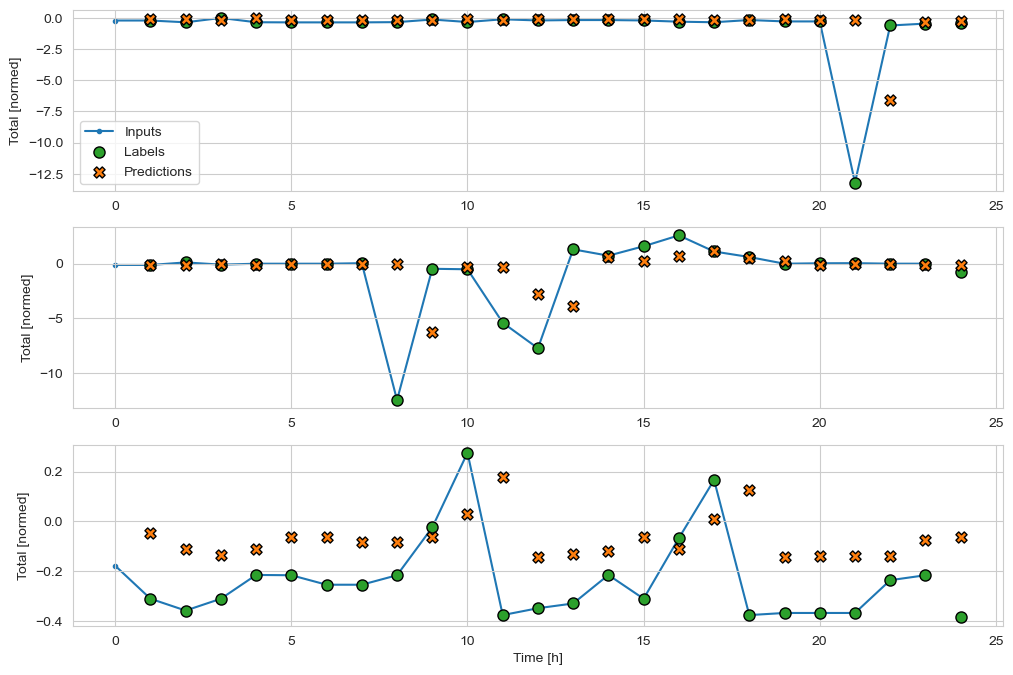

In [56]:
wider_window.plot(plot_col='Total', model=linear)

The bar plot indicates the contribution of each feature

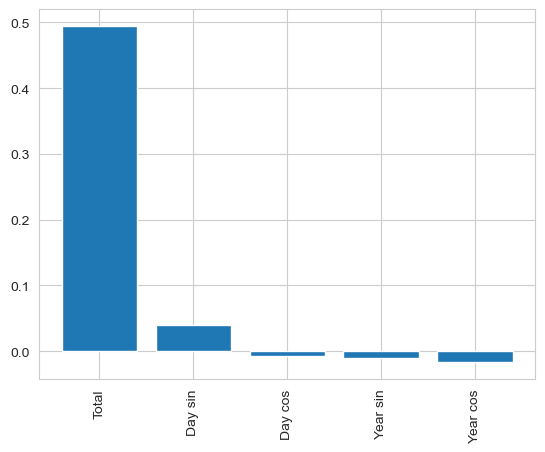

In [57]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## Applying Deep Dense Model including activation layer and single output

In [59]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

### Train

In [60]:
history = compile_and_fit(dense, single_step_window)

val_perform['Dense'] = dense.evaluate(single_step_window.val)
perform['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
    8/11791 [..............................] - ETA: 1:32 - loss: 2.8323 - mean_absolute_error: 0.4816 

2022-09-28 13:55:36.189959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11791/11791 [==============================] - ETA: 0s - loss: 0.7709 - mean_absolute_error: 0.3005

2022-09-28 13:57:01.613404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11791/11791 [==============================] - 103s 9ms/step - loss: 0.7709 - mean_absolute_error: 0.3005 - val_loss: 0.7802 - val_mean_absolute_error: 0.2855
Epoch 2/20
11791/11791 [==============================] - 102s 9ms/step - loss: 0.7638 - mean_absolute_error: 0.2967 - val_loss: 0.7748 - val_mean_absolute_error: 0.2813
Epoch 3/20
11791/11791 [==============================] - 101s 9ms/step - loss: 0.7617 - mean_absolute_error: 0.2953 - val_loss: 0.7789 - val_mean_absolute_error: 0.2874
Epoch 4/20
3369/3369 [==============================] - 20s 6ms/step - loss: 0.7796 - mean_absolute_error: 0.2771


In [61]:
print('Input shape:', wider_window.example[0].shape)
print('Output shape:', baseline(wider_window.example[0]).shape)

Input shape: (32, 24, 5)
Output shape: (32, 24, 1)


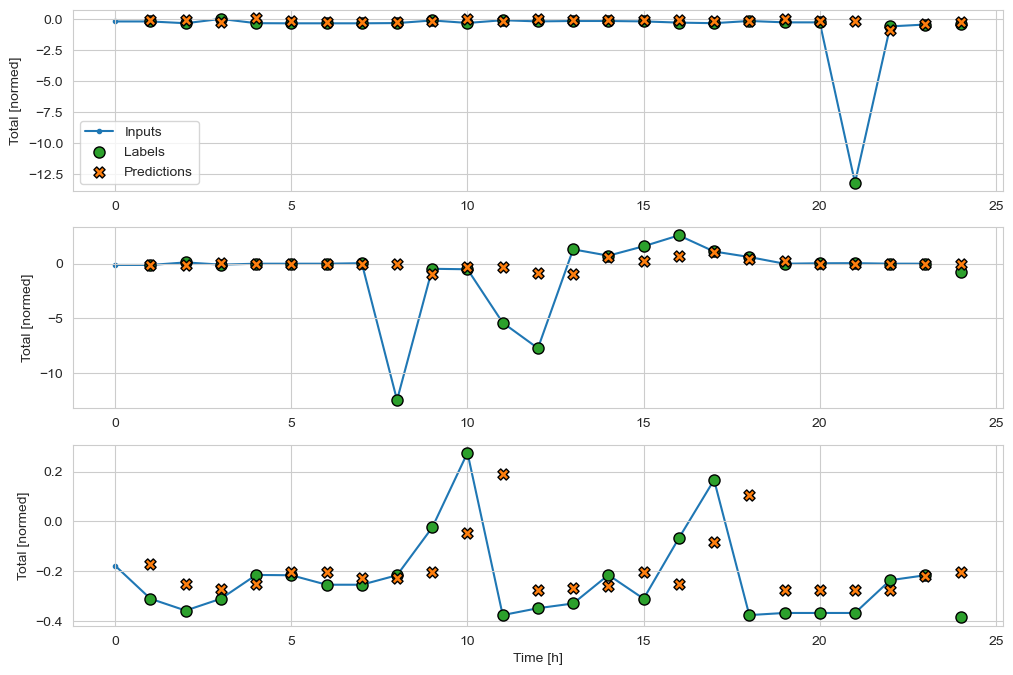

In [62]:
wider_window.plot(plot_col='Total', model=dense)

## Applying Deep Dense Model with multi-step

The baseline, linear and dense models handled each time step independently. Unfortunately, the models cant see how the input features are changing over time because they are handled each time step independently. A solution is to give the model access to multiple time steps when making predictions. As a result the model will take multiple time steps as input to produce a single output.

Creation of a Window with 3h history, 1h labels and 1h future prediction

In [63]:
CONV_WIDTH = 3
conv_window = WindowGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Total'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Total']

Given 3 hours of inputs, predict 1 hour into the future.


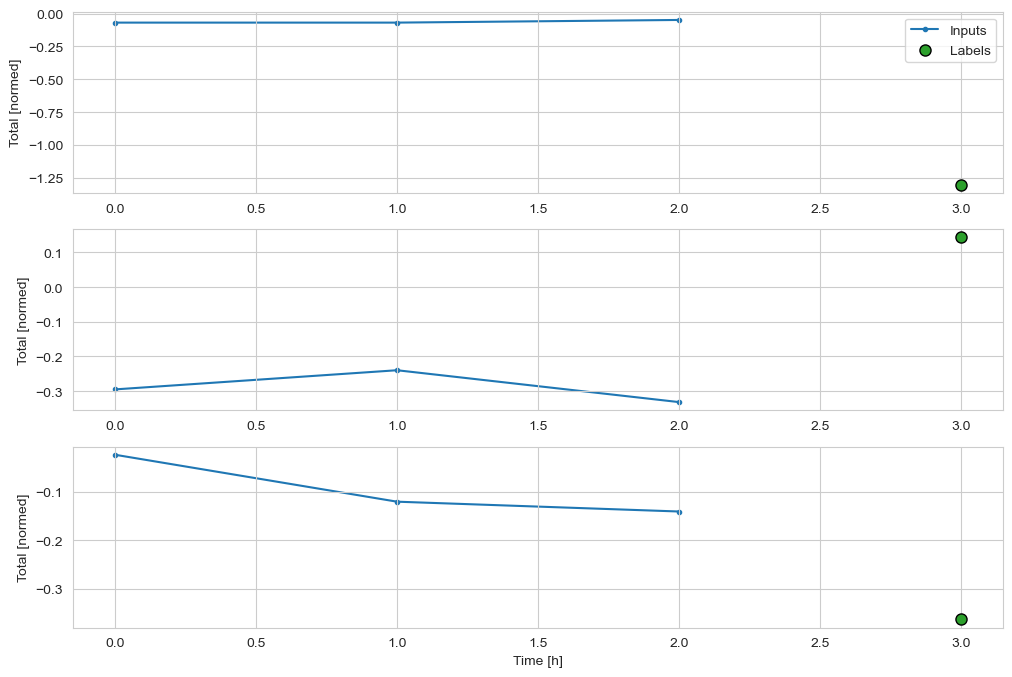

In [64]:
conv_window.plot(plot_col='Total')
print("Given 3 hours of inputs, predict 1 hour into the future.");

In [65]:
units = 32
activation = 'relu'

model_multi_step_dense = tf.keras.Sequential([
    # Reduce the dims by flattening
    tf.keras.layers.Flatten(),
    # Deeper
    tf.keras.layers.Dense(units=units, activation=activation),
    tf.keras.layers.Dense(units=units, activation=activation),
    # Single output
    tf.keras.layers.Dense(units=1),
    # Reshape to origin dims
    tf.keras.layers.Reshape([1, -1])
])

In [66]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', model_multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 5)
Output shape: (32, 1, 1)


### Train

In [67]:
history = compile_and_fit(model_multi_step_dense, conv_window)

Epoch 1/20


2022-09-28 14:05:18.565733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11791/11791 [==============================] - ETA: 0s - loss: 0.7309 - mean_absolute_error: 0.2940

2022-09-28 14:06:13.137801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11791/11791 [==============================] - 63s 5ms/step - loss: 0.7309 - mean_absolute_error: 0.2940 - val_loss: 0.7222 - val_mean_absolute_error: 0.2530
Epoch 2/20
11791/11791 [==============================] - 62s 5ms/step - loss: 0.7175 - mean_absolute_error: 0.2860 - val_loss: 0.7159 - val_mean_absolute_error: 0.2611
Epoch 3/20
11791/11791 [==============================] - 62s 5ms/step - loss: 0.7150 - mean_absolute_error: 0.2844 - val_loss: 0.7081 - val_mean_absolute_error: 0.2542
Epoch 4/20
11791/11791 [==============================] - 61s 5ms/step - loss: 0.7131 - mean_absolute_error: 0.2836 - val_loss: 0.7099 - val_mean_absolute_error: 0.2487
Epoch 5/20
11791/11791 [==============================] - 61s 5ms/step - loss: 0.7119 - mean_absolute_error: 0.2831 - val_loss: 0.7061 - val_mean_absolute_error: 0.2531
Epoch 6/20
11791/11791 [==============================] - 62s 5ms/step - loss: 0.7104 - mean_absolute_error: 0.2827 - val_loss: 0.7052 - val_mean_absolute_error: 0.25

In [68]:
val_perform['multi_step_dense'] = model_multi_step_dense.evaluate(conv_window.val)
perform['multi_step_dense'] = model_multi_step_dense.evaluate(conv_window.test, verbose=0)

3369/3369 [==============================] - 11s 3ms/step - loss: 0.7079 - mean_absolute_error: 0.2513


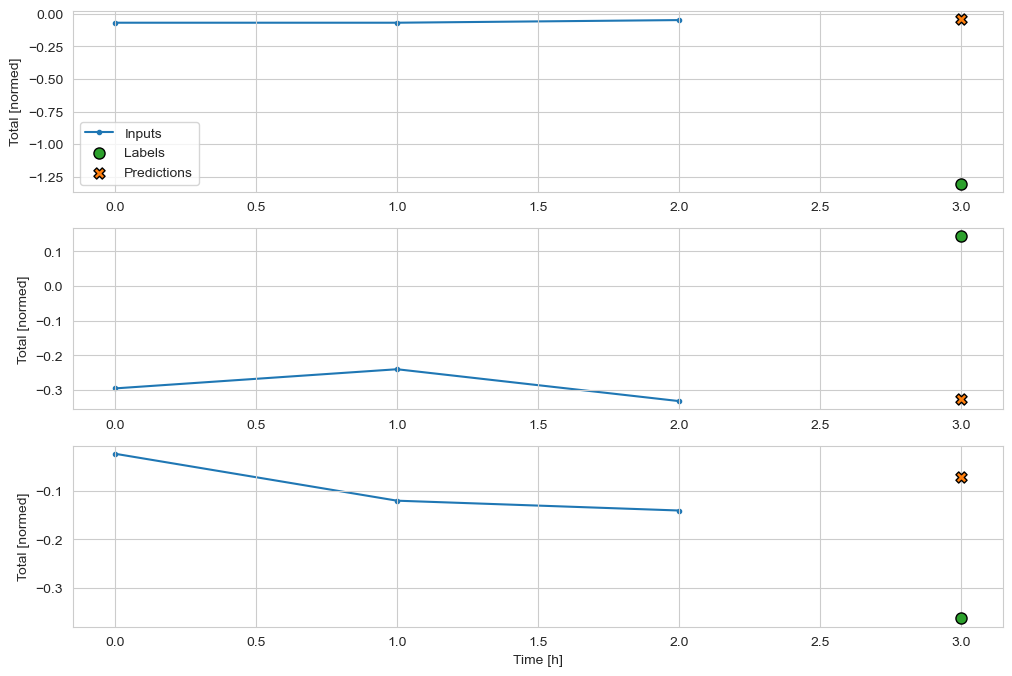

In [69]:
conv_window.plot(plot_col='Total', model=model_multi_step_dense)

The models' result can only be executed on the shape of input window which is not preferable. This can be solved by applying convolution neural network.

## Applying Convolutional Model with multi-step

In [70]:
filters = 32
units = 32
activation = 'relu'

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=filters,
                           kernel_size=(CONV_WIDTH,),
                           activation=activation),
    tf.keras.layers.Dense(units=units, activation=activation),
    tf.keras.layers.Dense(units=1),
])

Running conv model on example dataset to check the expected shape

In [71]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 5)
Output shape: (32, 1, 1)


### Train

In [72]:
history = compile_and_fit(conv_model, conv_window)

Epoch 1/20
    1/11791 [..............................] - ETA: 1:04:12 - loss: 0.6410 - mean_absolute_error: 0.5532

2022-09-28 14:16:24.569846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11791/11791 [==============================] - ETA: 0s - loss: 0.7281 - mean_absolute_error: 0.2928

2022-09-28 14:17:41.809913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11791/11791 [==============================] - 92s 8ms/step - loss: 0.7281 - mean_absolute_error: 0.2928 - val_loss: 0.7297 - val_mean_absolute_error: 0.2835
Epoch 2/20
11791/11791 [==============================] - 92s 8ms/step - loss: 0.7176 - mean_absolute_error: 0.2863 - val_loss: 0.7303 - val_mean_absolute_error: 0.2760
Epoch 3/20
11791/11791 [==============================] - 91s 8ms/step - loss: 0.7154 - mean_absolute_error: 0.2849 - val_loss: 0.7140 - val_mean_absolute_error: 0.2612
Epoch 4/20
11791/11791 [==============================] - 93s 8ms/step - loss: 0.7133 - mean_absolute_error: 0.2836 - val_loss: 0.7209 - val_mean_absolute_error: 0.2716
Epoch 5/20
11791/11791 [==============================] - 94s 8ms/step - loss: 0.7119 - mean_absolute_error: 0.2832 - val_loss: 0.7177 - val_mean_absolute_error: 0.2664


In [73]:
val_perform['conv'] = conv_model.evaluate(conv_window.val)
perform['conv'] = conv_model.evaluate(conv_window.test, verbose=0)

3369/3369 [==============================] - 18s 5ms/step - loss: 0.7177 - mean_absolute_error: 0.2664


Benefit of Convolution opposed to Dense is the acceptance of any input shape

In [75]:
print("Wider window")
print('Input shape:', wider_window.example[0].shape)
print('Labels shape:', wider_window.example[1].shape)
print('Output shape:', conv_model(wider_window.example[0]).shape)

Wider window
Input shape: (32, 24, 5)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


Now lets use a wider input -> LABEL_WIDTH + (CONV_WIDTH - 1). Remember, conv width is the kernel size aka filter size.

In [77]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)

wide_conv_window = WindowGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Total'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['Total']

In [78]:
print("Wider conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wider conv window
Input shape: (32, 26, 5)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


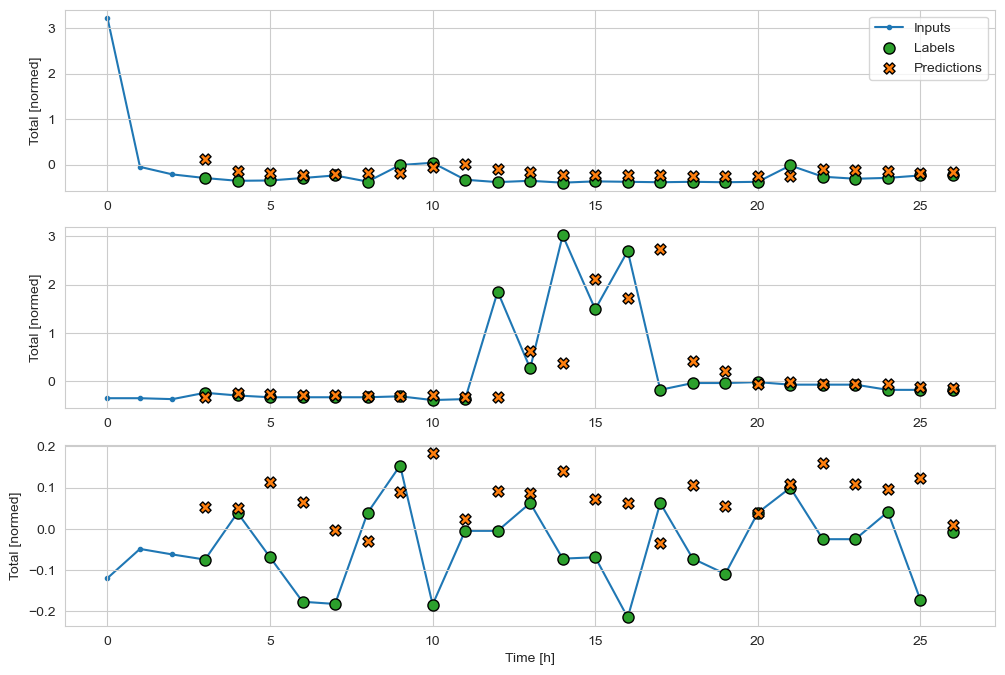

In [79]:
wide_conv_window.plot(plot_col='Total', model=conv_model)

Every prediction here is based on the 3 preceding time steps!

## Applying Recurrent Neural Network

using 24h history

In [96]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    # We use return_sequences=True in order to train a model on multiple time steps simultaneously
    tf.keras.layers.LSTM(units=32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [97]:
print('Input shape:', wider_window.example[0].shape)
print('Output shape:', lstm_model(wider_window.example[0]).shape)

Input shape: (32, 24, 5)
Output shape: (32, 24, 1)


### Train

In [98]:
history = compile_and_fit(lstm_model, wider_window)

Epoch 1/20


2022-09-28 14:38:38.268556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-28 14:38:38.372019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-28 14:38:38.642621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11790/11790 [==============================] - ETA: 0s - loss: 0.7012 - mean_absolute_error: 0.2804

2022-09-28 14:40:50.222906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-28 14:40:50.277113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11790/11790 [==============================] - 154s 13ms/step - loss: 0.7012 - mean_absolute_error: 0.2804 - val_loss: 0.7037 - val_mean_absolute_error: 0.2677
Epoch 2/20
11790/11790 [==============================] - 157s 13ms/step - loss: 0.6860 - mean_absolute_error: 0.2778 - val_loss: 0.7037 - val_mean_absolute_error: 0.2638
Epoch 3/20
11790/11790 [==============================] - 158s 13ms/step - loss: 0.6771 - mean_absolute_error: 0.2774 - val_loss: 0.7116 - val_mean_absolute_error: 0.2688
Epoch 4/20
11790/11790 [==============================] - 161s 14ms/step - loss: 0.6694 - mean_absolute_error: 0.2774 - val_loss: 0.7178 - val_mean_absolute_error: 0.2667


Saving the trained model

In [108]:
lstm_model.save("../models/model_rnn_lstm-20")

INFO:tensorflow:Assets written to: ../models/model_rnn_lstm-20/assets


INFO:tensorflow:Assets written to: ../models/model_rnn_lstm-20/assets


Loading and casting the pretrained model to BaseModel

In [114]:
import keras

pretrained_model = keras.models.load_model("../models/model_rnn_lstm-20", custom_objects={
    'BaseModel': Baseline
})

In [99]:
val_perform['LSTM'] = lstm_model.evaluate(wider_window.val)
perform['LSTM'] = lstm_model.evaluate(wider_window.test, verbose=0)

3368/3368 [==============================] - 24s 7ms/step - loss: 0.7178 - mean_absolute_error: 0.2667


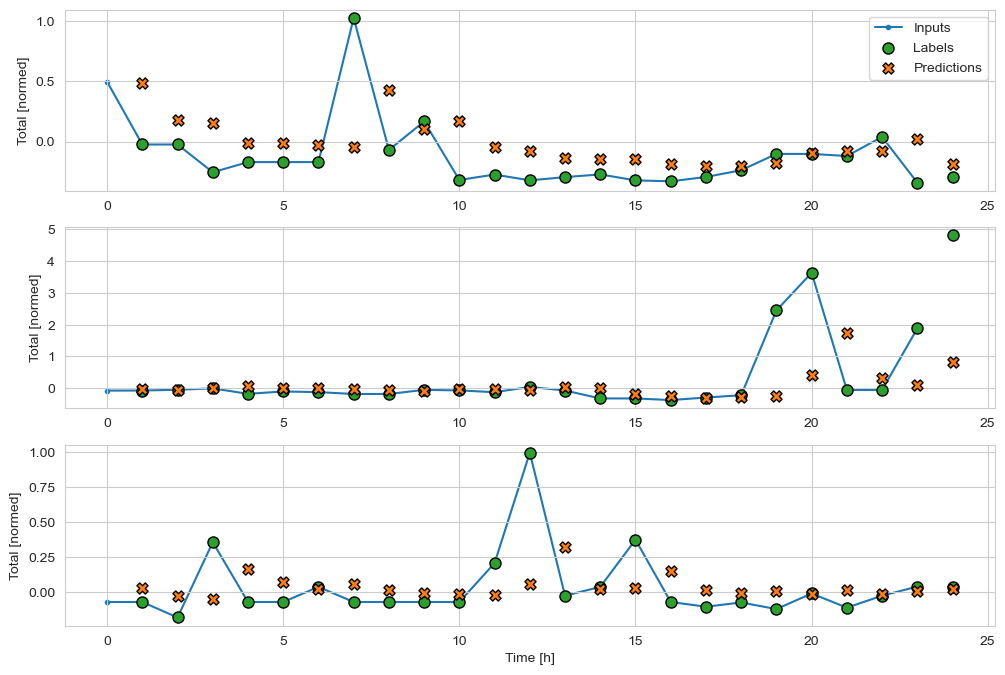

In [100]:
wider_window.plot(plot_col='Total', model=lstm_model)

## Comparing the models

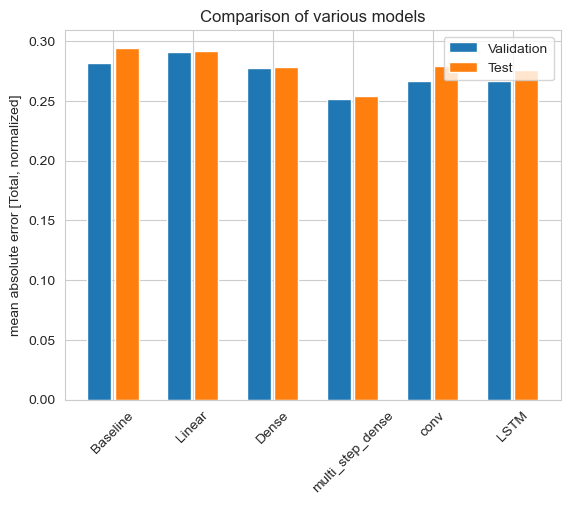

In [106]:
x = np.arange(len(perform))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_perform.values()]
test_mae = [v[metric_index] for v in perform.values()]

plt.ylabel('mean absolute error [Total, normalized]')
plt.title('Comparison of various models')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=perform.keys(),
           rotation=45)

plt.savefig('./comparison.png')
_ = plt.legend()